In [1]:
#import libraries as per requirement
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#importing my dataset
dataset =pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#dividing dependent and independent variables
x = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [9]:
#create string values to dummy integer values for Geography and Gender
geography = pd.get_dummies(x["Geography"], drop_first=True)
gender = pd.get_dummies(x["Gender"], drop_first=True)
print(geography.head())
print("\n")
print(gender.head())

   Germany  Spain
0        0      0
1        0      1
2        0      0
3        0      0
4        0      1


   Male
0     0
1     0
2     0
3     0
4     0


In [10]:
#now, lets combine these dataframes to our indepedent dataset "x"
x = pd.concat([x, geography, gender], axis=1)
#and lets drop unnecessary columns
x = x.drop(["Geography","Gender"], axis=1)

In [11]:
#split dataset into train and test data
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [13]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


# Making ANN

In [14]:
#import keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

Using TensorFlow backend.


In [15]:
# initialize ANN
classifierModel = Sequential()

In [16]:
#Lets add the input layer and first hidden layer
classifierModel.add(Dense(units=6, kernel_initializer="he_uniform", activation="relu", input_dim=11))
#units are number of hidden neurons in the hidden layer
#input_dim describes how many input features are connected to the hidden layer

Instructions for updating:
Colocations handled automatically by placer.


In [17]:
#Adding second hidden layer
classifierModel.add(Dense(units=6, kernel_initializer="he_uniform", activation="relu"))

In [18]:
#Lets now add the output layer
classifierModel.add(Dense(units=1, kernel_initializer="glorot_uniform", activation="sigmoid"))

In [19]:
#Let us check the model we've built
classifierModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [21]:
#now lets compile ANN
classifierModel.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [22]:
#fitting ANN to training set for 100 epochs i.e. the model passes the training data for 100 times to out classifier model
model_history= classifierModel.fit(X_train, y_train, validation_split=0.33, batch_size=10, nb_epoch=100)

Instructions for updating:
Use tf.cast instead.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 2s 307us/step - loss: 0.5821 - acc: 0.7528 - val_loss: 0.5032 - val_acc: 0.7974
Epoch 2/100
5359/5359 [==============================] - 1s 169us/step - loss: 0.4777 - acc: 0.8000 - val_loss: 0.4550 - val_acc: 0.8039
Epoch 3/100
5359/5359 [==============================] - 1s 167us/step - loss: 0.4399 - acc: 0.8089 - val_loss: 0.4323 - val_acc: 0.8145
Epoch 4/100
5359/5359 [==============================] - 1s 213us/step - loss: 0.4205 - acc: 0.8160 - val_loss: 0.4228 - val_acc: 0.8111
Epoch 5/100
5359/5359 [==============================] - 1s 217us/step - loss: 0.4095 - acc: 0.8212 - val_loss: 0.4163 - val_acc: 0.8141
Epoch 6/100
5359/5359 [==============================] - 1s 159us/step - loss: 0.4018 - acc: 0.8242 - val_loss: 0.4115 - val_acc: 0.8164
Epoch 7/100
5359/5359 [==============================] - 1s 207us/step - loss: 0.3958 - acc: 0.8250 - val_loss: 0.4058 - val_acc: 

5359/5359 [==============================] - 1s 168us/step - loss: 0.3373 - acc: 0.8606 - val_loss: 0.3669 - val_acc: 0.8485
Epoch 61/100
5359/5359 [==============================] - 1s 165us/step - loss: 0.3367 - acc: 0.8623 - val_loss: 0.3665 - val_acc: 0.8497
Epoch 62/100
5359/5359 [==============================] - 1s 166us/step - loss: 0.3365 - acc: 0.8630 - val_loss: 0.3674 - val_acc: 0.8482
Epoch 63/100
5359/5359 [==============================] - 1s 167us/step - loss: 0.3360 - acc: 0.8621 - val_loss: 0.3658 - val_acc: 0.8489
Epoch 64/100
5359/5359 [==============================] - 1s 168us/step - loss: 0.3368 - acc: 0.8625 - val_loss: 0.3668 - val_acc: 0.8493
Epoch 65/100
5359/5359 [==============================] - 1s 164us/step - loss: 0.3363 - acc: 0.8610 - val_loss: 0.3664 - val_acc: 0.8493
Epoch 66/100
5359/5359 [==============================] - 1s 203us/step - loss: 0.3361 - acc: 0.8619 - val_loss: 0.3666 - val_acc: 0.8485
Epoch 67/100
5359/5359 [=======================

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


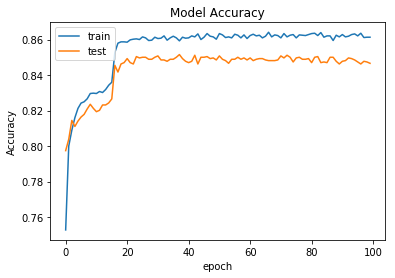

In [23]:
#list all data in history
print(model_history.history.keys())
#summarize history for accuracy
plt.plot(model_history.history["acc"])
plt.plot(model_history.history["val_acc"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"], loc="upper left")
plt.show()


In [24]:
#making predictions and evaluating model
#test set results prediction
y_predict = classifierModel.predict(X_test)
y_predict = (y_predict>0.5)

#making confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)

In [25]:
#calculating accuracy
from sklearn.metrics import accuracy_score
acc =  accuracy_score(y_predict, y_test)

In [26]:
print(cm)

[[1529   66]
 [ 215  190]]


In [27]:
print(acc)

0.8595
